## Project Description - Bank Churn Prediction
### Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not

### Import necessary libraries and Data

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import Tensorflow and check version
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Mount Google Drive to Collaboratory 
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Import data from collaboratory 
df = pd.read_csv('/content/gdrive/My Drive/AI NEURAL NETWORK/Chun Project/Data/bank.csv')

### Exploratory Data Quality Report

In [5]:
# General Description of the DataFrame
df.head() #view the first 5 rows of the dataframe


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [6]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# confirm the number of rows and columns in the dataframe
df.shape

(10000, 14)

Dataframe contains 10,000 data records with 11 numerical and 3 categorical columns.


In [8]:
#Descriptive Statistics of dataframe using describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


In [9]:
# Check for the number of unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

There are 10,000 unique customers with unique customer Id, although several customers share thesame surnames


In [10]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing records in the dataframe.


In [12]:
# Check skewness of numerical variables 
df.skew()

RowNumber          0.00
CustomerId         0.00
CreditScore       -0.07
Age                1.01
Tenure             0.01
Balance           -0.14
NumOfProducts      0.75
HasCrCard         -0.90
IsActiveMember    -0.06
EstimatedSalary    0.00
Exited             1.47
dtype: float64

### Feature Engineering and Feature Elimination

In [13]:
#drop features that will not impact model
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [14]:
# convert the categorical features to numerical features using one-hot code to remove the order
df = pd.get_dummies(df, columns=['Geography', 'Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,"101,348.88",1,1,0,0,1,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,0,1,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,1,0,0,1,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,0,1,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


**Multivariate** **Analysis**

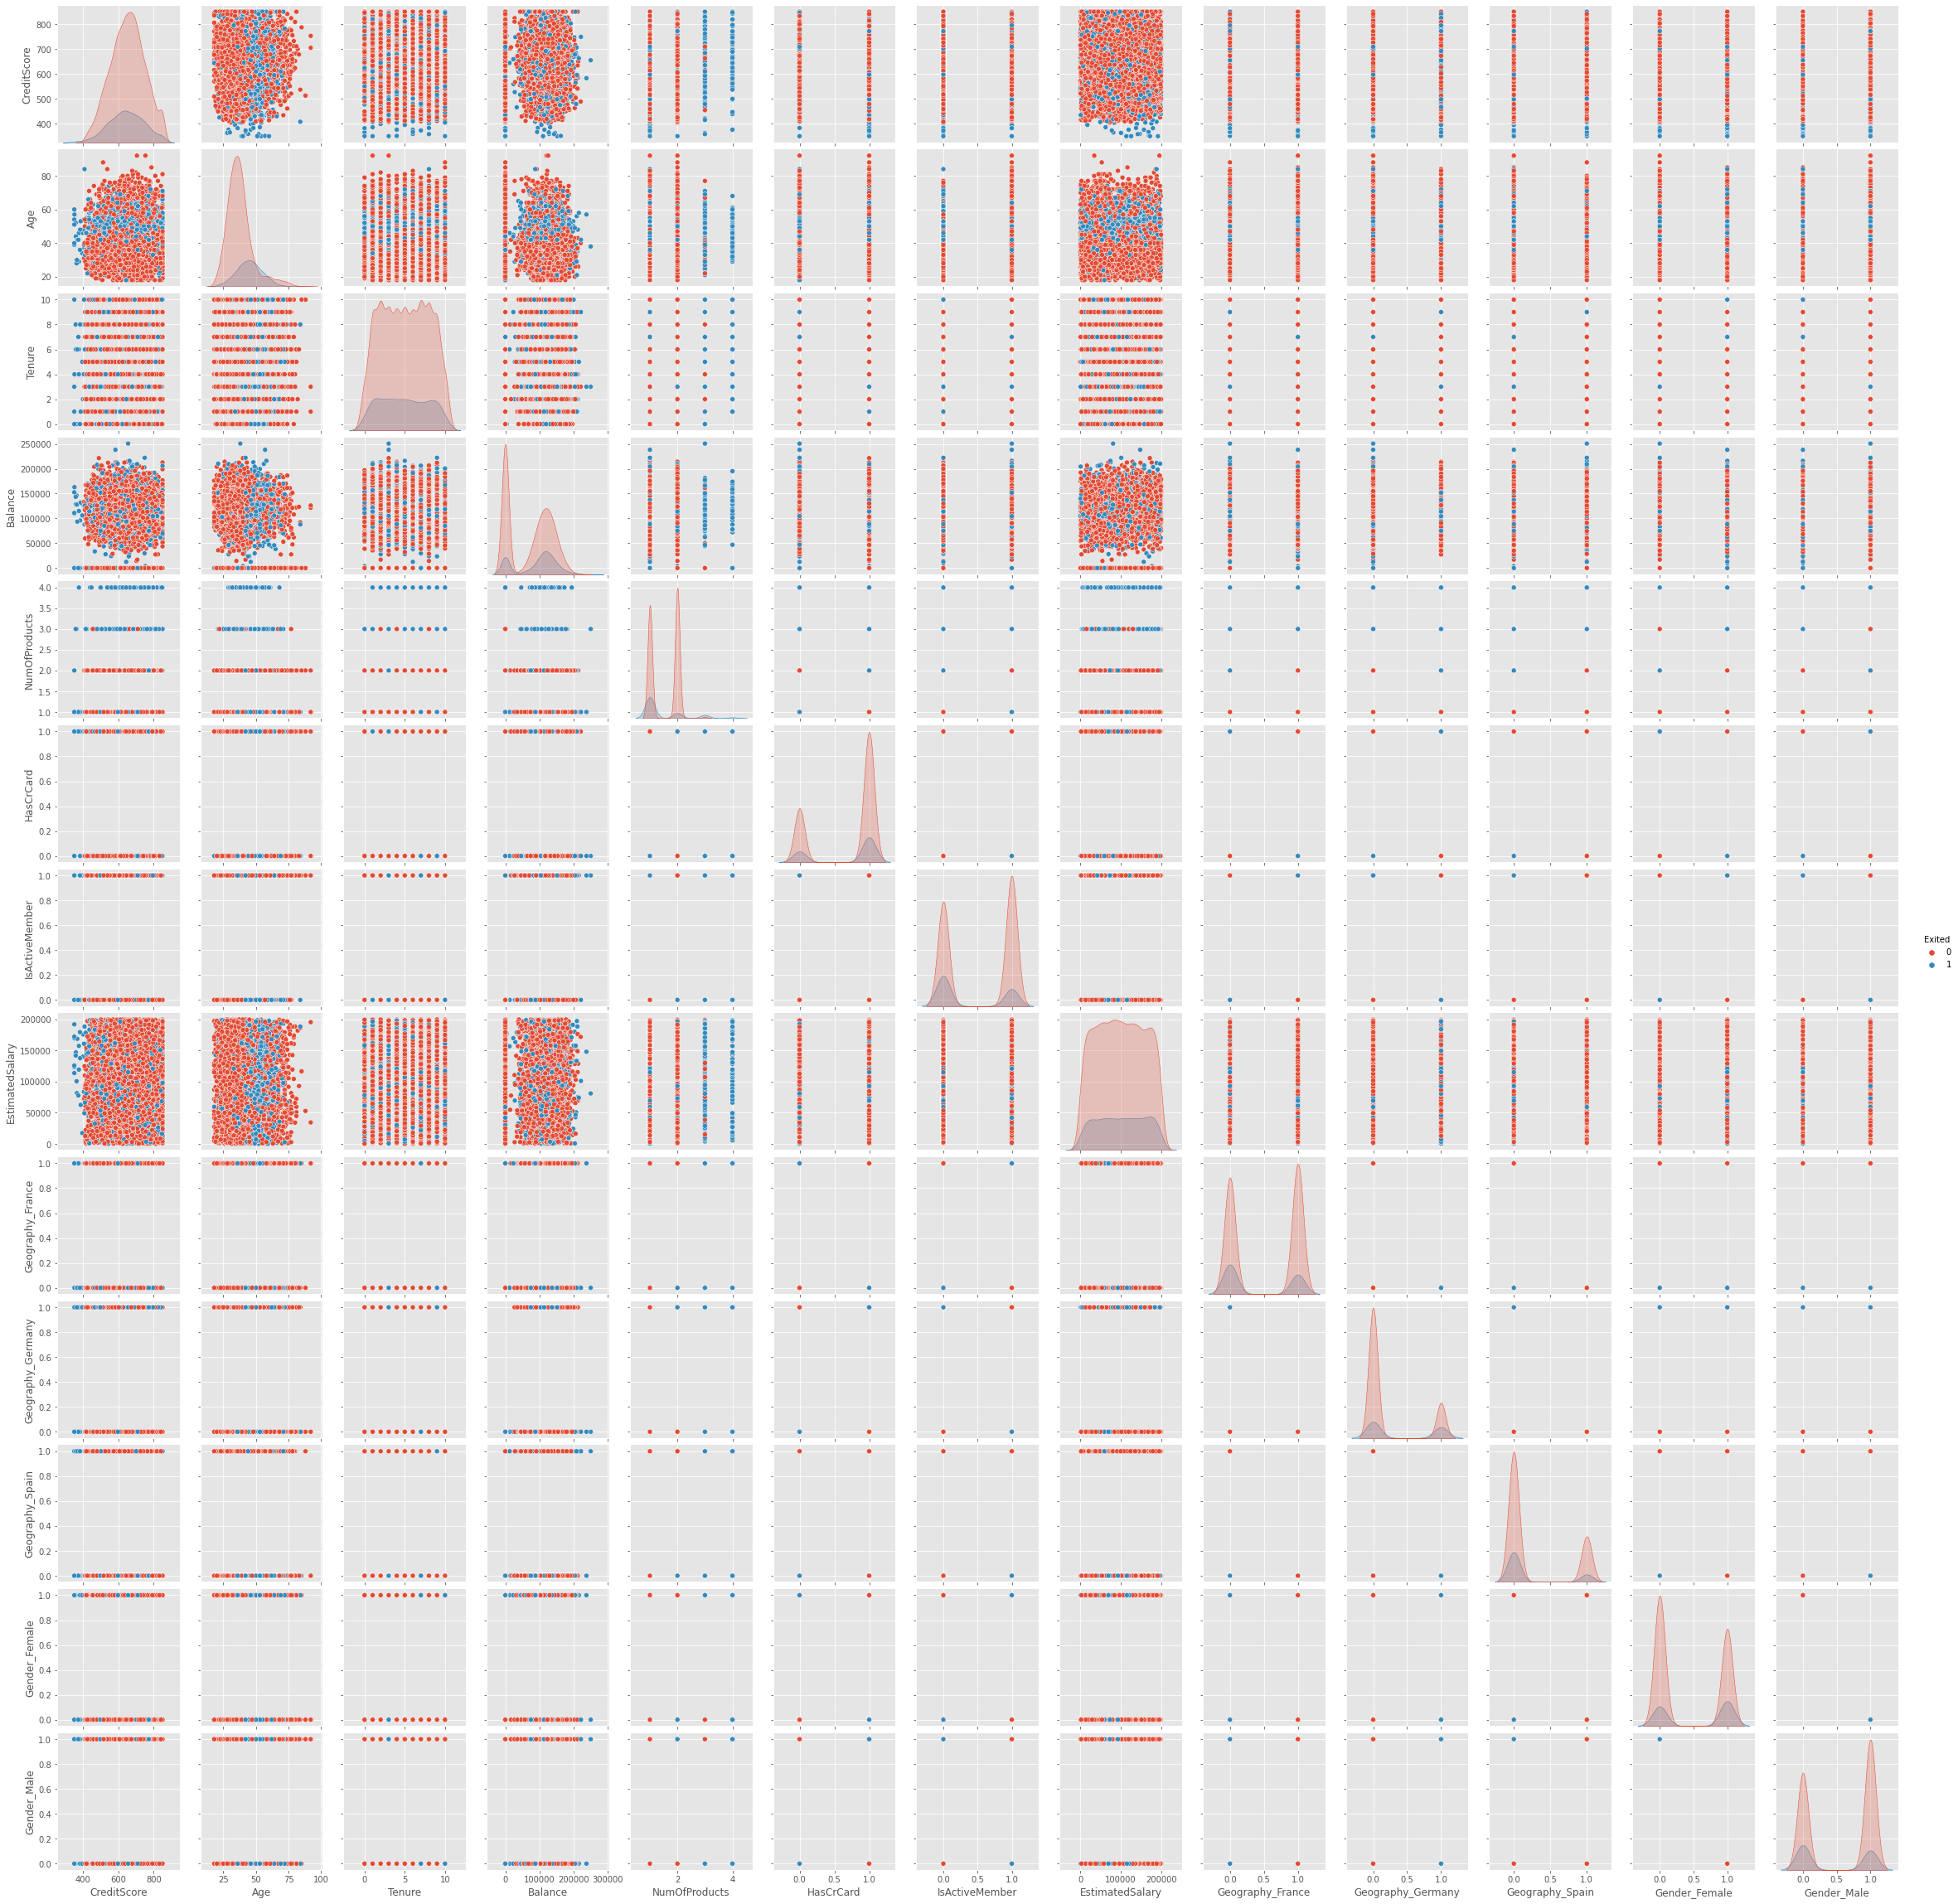

In [16]:
sns.pairplot(df,hue = 'Exited',diag_kind='kde')

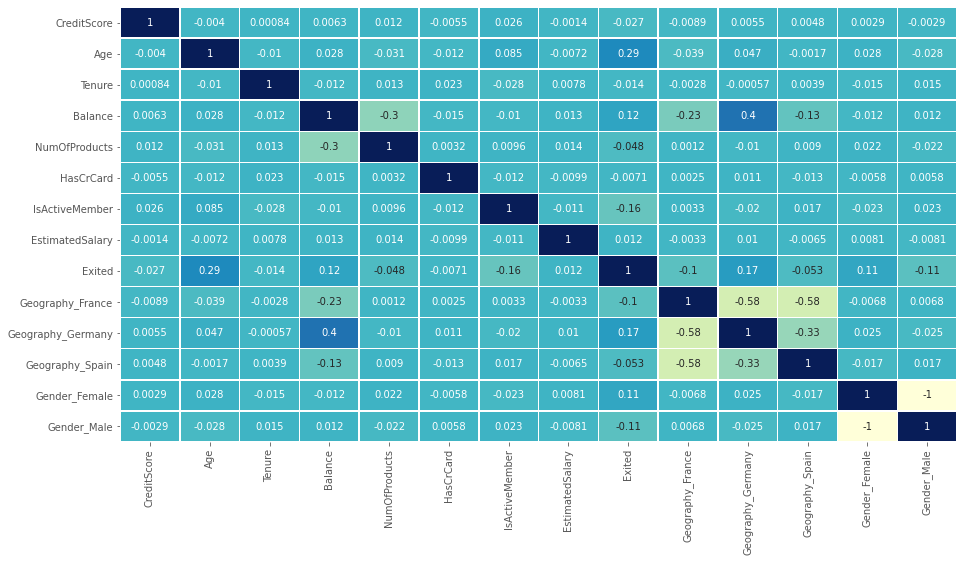

In [17]:
# Check if correlation exist amongst the variables
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

No Strong Correlation exists among the variables.

### Distinguish the features and Target Sets

In [18]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X = df.drop(columns=['Exited'])

# Specify the target labels and flatten array
y = df['Exited']


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

### Data Normalization

In [19]:
# Use standard scaler to normalise the data
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [20]:
# Print the shape of the training and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


### Model Building : Deep Neural Network

In [21]:
#Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


**Base Case Model**

In [22]:
#create model with Sequential class

model = Sequential() # Initialize the constructor

In [23]:
# Define model architecture : Adding layers [layers and activations]

# Add an first hidden layer 

model.add(Dense(64,input_shape = (13,),  activation = 'relu', kernel_initializer='normal'))

# second hidden layer
model.add(Dense(32, activation='relu', kernel_initializer='normal'))

# Add an output layer with one neuron
model.add(Dense(1,activation = 'sigmoid'))

In [24]:
### compile model via optimizers and loss functions
opt = keras.optimizers.Adam(learning_rate = 0.01)
# sgd = keras.optimizers.SGD( learning_rate=0.01,momentum=0.0, nesterov=False, name="SGD")
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy']) #using adam optimizer and categorical_crossentropy loss function

In [25]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Training the compiled model

model.fit(X_train, y_train, epochs=10, batch_size=1000, verbose=1) 

Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.3070
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.3070

**Improved Model based on Model Accuracy**

In [27]:
#create model with Sequential class

model_2 = Sequential() # Initialize the constructor

# Define model architecture : Adding layers [layers and activations]

# Add an first hidden layer 

model_2.add(Dense(64,input_shape = (13,),  activation = 'relu', kernel_initializer='normal'))

# second hidden layer
model_2.add(Dense(32, activation='relu', kernel_initializer='normal'))

# Add an output layer with one neuron
model_2.add(Dense(1,activation = 'tanh'))


In [28]:
## compile model via optimizers and loss functions
# opt = keras.optimizers.Adam(learning_rate = 0.01)
sgd = keras.optimizers.SGD( learning_rate=0.01,momentum=0.0, nesterov=False, name="SGD")
model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy']) #using adam optimizer and categorical_crossentropy loss function

In [29]:
# Summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Training the compiled model

model_2.fit(X_train, y_train, epochs=10, batch_size=1000, verbose=1) 

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924

Both Models were built using 2 hidden layers and one output layer. 

The First Model was built using an output layer with a Sigmoid activation function. The Adam Optimizer was used for this model and it had a model accuracy 0.307.

On the otherhand,  the Second Model, was built using an tanh activation funtion at the Output layer and a stochastic gradient descent optimizer. The model accuracy was 0.7924


### Model Prediction and Performance Evaluation

**Model Prediction**

In [31]:
# Predict Model Probabilities for Test Data 
y_predict = model_2.predict(X_test)
y_predict

array([[ 0.00117257],
       [-0.02575954],
       [-0.01624804],
       ...,
       [-0.00076795],
       [ 0.00725364],
       [ 0.03795444]], dtype=float32)

In [32]:
# Predict Model Classes using Threshold of 0.5. N/B - The default threshold for model.predict_classes() in sklearn is 0.5
y_pred_cls = model_2.predict_classes(X_test)
y_pred_cls

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

**Model Performance Evaluation**

In [33]:
# Evaluate Model Performance Metrics
results = model_2.evaluate(X_test, y_test)
print(model_2.metrics_names)
print(results)    

94/94 [==============================] - 0s 886us/step - loss: 2.3206e-08 - accuracy: 0.8053
['loss', 'accuracy']
[2.3206075283610517e-08, 0.8053333163261414]


In [34]:
# Import Confusion Matrix and Classification metrics from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

In [35]:
# Evaluate Model Classes and Print Confusion Matrix
Y_pred_cls = model_2.predict_classes(X_test, batch_size=1000, verbose=1)
confusion_matrix(y_test, Y_pred_cls)

3/3 [==============================] - 0s 2ms/step


array([[2416,    0],
       [ 584,    0]])

In [36]:
# Evaluate Model Classes and Print Metrics
print('Accuracy of Model: '+ str(model_2.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))




94/94 [==============================] - 0s 972us/step - loss: 2.3206e-08 - accuracy: 0.8053
Accuracy of Model: 0.8053333163261414
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Evaluate Model Classes and Print Confusion Matrix
Y_pred_cls = model.predict_classes(X_test, batch_size=1000, verbose=1)
confusion_matrix(y_test, Y_pred_cls)
# Evaluate Model Classes and Print Metrics
print('Accuracy of Model: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)



94/94 [==============================] - 0s 935us/step - loss: 2.3206e-08 - accuracy: 0.2943
Accuracy of Model: 0.2943333387374878
Recall_score: 0.886986301369863
Precision_score: 0.2016348773841962
F-score: 0.3285759594037425


array([[ 365, 2051],
       [  66,  518]])

### **Conclusion**
The objective of this Project was to determine whether a Customer would leave the Bank for another bank. 

Thus the focus would be on reducing the False Negatives because if the FN are high it means that we would be targeting the wrong customers. So the Model with the high Recall Score should be taken forward for further testing to improve the F-1 Score. 

Although the second model has a high Accuracy, for this classification project, Recall and F1 Score is a better yardstick to be used for Evaluation.



